# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [176]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [177]:
import pandas as pd
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of y =", len(y_train))

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of y = 34799


In [178]:
## Import label file

traffic_labels = pd.read_csv("signnames.csv")
traffic_labels.tail(10)


,ClassId,SignName
33,33,Turn right ahead
34,34,Turn left ahead
35,35,Ahead only
36,36,Go straight or right
37,37,Go straight or left
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vehicles over 3.5 metric ...


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [179]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

In [180]:
def plotRandomly(datax,datay, cmap=None,squeeze = False,numofimages = 3):
    
    
    #fig,axs = plt.subplots(class_n,10,figsize=(20,4))
    #fig.subplots_adjust(hspace = 0, wspace=.2)
    #axs = axs.ravel()
    #axs = np.reshape(axs,(-1,1))
    #axs = axs.squeeze()
        
    for i in range(n_classes):   
        
        print("{0}. {1}".format(i, traffic_labels[traffic_labels["ClassId"] == i]["SignName"].get_values()))
        indexes = np.where(datay == i)[0]
        random_samples = random.sample(list(indexes), numofimages)
        fig = plt.figure(figsize = (numofimages, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for j in range(numofimages):      
            image = datax[random_samples[j]]
            axis = fig.add_subplot(1,numofimages, j+1)          
            if squeeze: 
                image = image.squeeze()
            axis.imshow(image,cmap=cmap)
            axis.axis("off")
        plt.show()        
        


0. ['Speed limit (20km/h)']


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


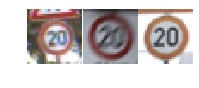

1. ['Speed limit (30km/h)']


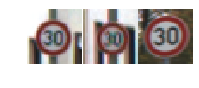

2. ['Speed limit (50km/h)']


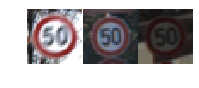

3. ['Speed limit (60km/h)']


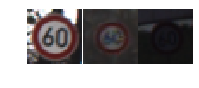

4. ['Speed limit (70km/h)']


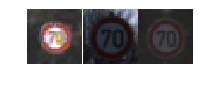

5. ['Speed limit (80km/h)']


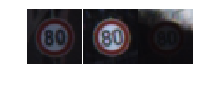

6. ['End of speed limit (80km/h)']


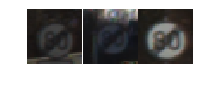

7. ['Speed limit (100km/h)']


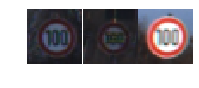

8. ['Speed limit (120km/h)']


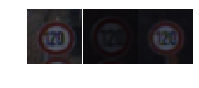

9. ['No passing']


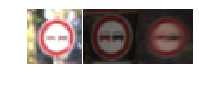

10. ['No passing for vehicles over 3.5 metric tons']


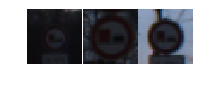

11. ['Right-of-way at the next intersection']


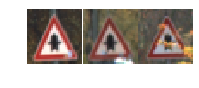

12. ['Priority road']


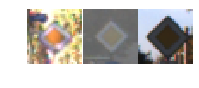

13. ['Yield']


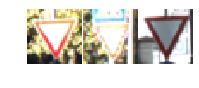

14. ['Stop']


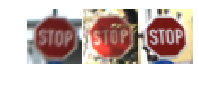

15. ['No vehicles']


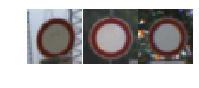

16. ['Vehicles over 3.5 metric tons prohibited']


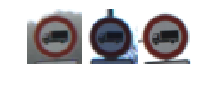

17. ['No entry']


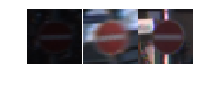

18. ['General caution']


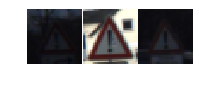

19. ['Dangerous curve to the left']


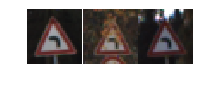

20. ['Dangerous curve to the right']


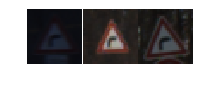

21. ['Double curve']


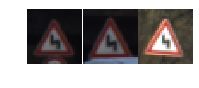

22. ['Bumpy road']


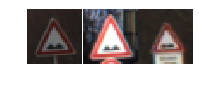

23. ['Slippery road']


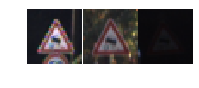

24. ['Road narrows on the right']


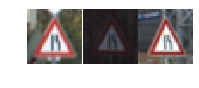

25. ['Road work']


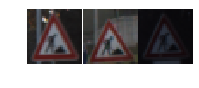

26. ['Traffic signals']


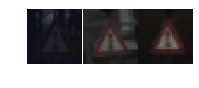

27. ['Pedestrians']


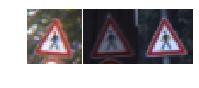

28. ['Children crossing']


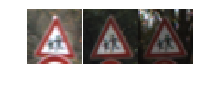

29. ['Bicycles crossing']


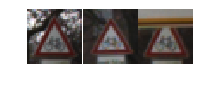

30. ['Beware of ice/snow']


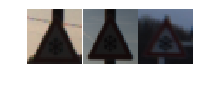

31. ['Wild animals crossing']


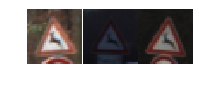

32. ['End of all speed and passing limits']


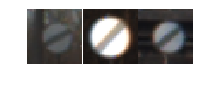

33. ['Turn right ahead']


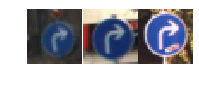

34. ['Turn left ahead']


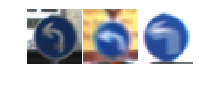

35. ['Ahead only']


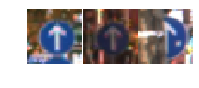

36. ['Go straight or right']


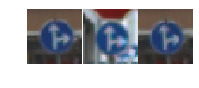

37. ['Go straight or left']


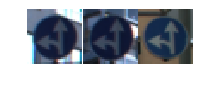

38. ['Keep right']


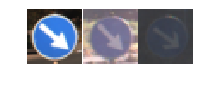

39. ['Keep left']


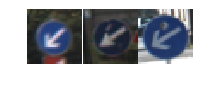

40. ['Roundabout mandatory']


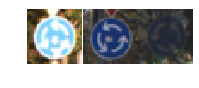

41. ['End of no passing']


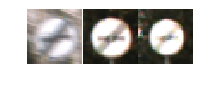

42. ['End of no passing by vehicles over 3.5 metric tons']


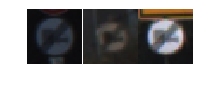

In [181]:
plotRandomly(X_train,y_train)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


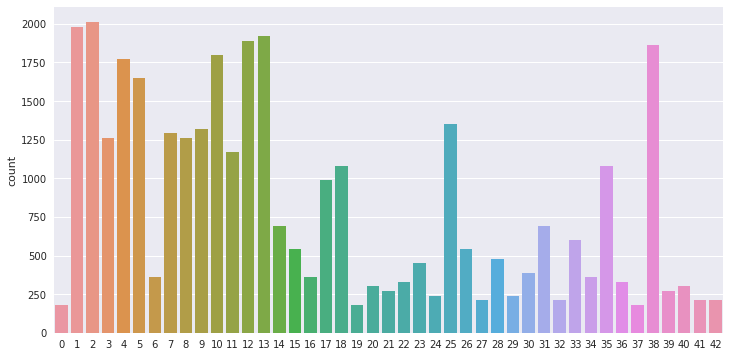

In [182]:
## Histogram of label Frequency
plt.figure(figsize=(12,6))
sns.countplot(x = y_train,)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [183]:
## ImportRequired libraries

import cv2

In [184]:
## Convert to GrayScale and Normalize

def getGrayScale(img):
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return img

def normalize(img):
    # To normalize between -0.5 to 0.5
    minimum = 0
    maximum = 255
    a = -0.5
    b = 0.5
    return a + ((img-minimum)*(b-a))/(maximum-minimum)

def preProcess(images):
    ret = []
    for image in images:
        ret.append(normalize(getGrayScale(image)))
    
    ret = np.asarray(ret)
    ret = np.expand_dims(ret , axis=3)    
    return ret


0. ['Speed limit (20km/h)']


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


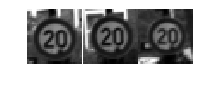

1. ['Speed limit (30km/h)']


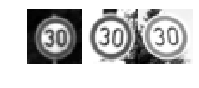

2. ['Speed limit (50km/h)']


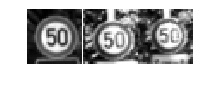

3. ['Speed limit (60km/h)']


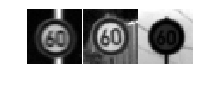

4. ['Speed limit (70km/h)']


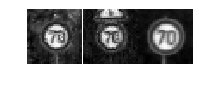

5. ['Speed limit (80km/h)']


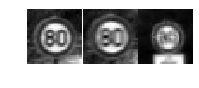

6. ['End of speed limit (80km/h)']


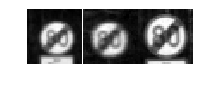

7. ['Speed limit (100km/h)']


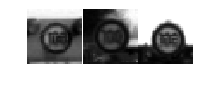

8. ['Speed limit (120km/h)']


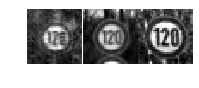

9. ['No passing']


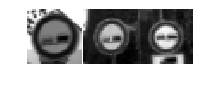

10. ['No passing for vehicles over 3.5 metric tons']


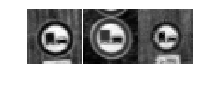

11. ['Right-of-way at the next intersection']


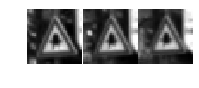

12. ['Priority road']


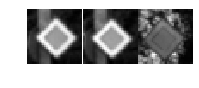

13. ['Yield']


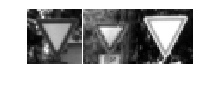

14. ['Stop']


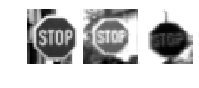

15. ['No vehicles']


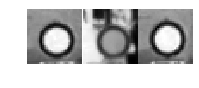

16. ['Vehicles over 3.5 metric tons prohibited']


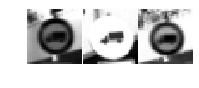

17. ['No entry']


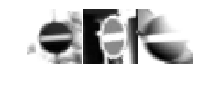

18. ['General caution']


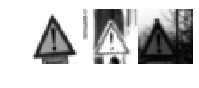

19. ['Dangerous curve to the left']


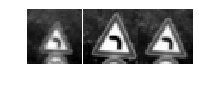

20. ['Dangerous curve to the right']


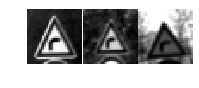

21. ['Double curve']


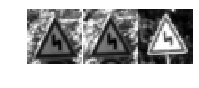

22. ['Bumpy road']


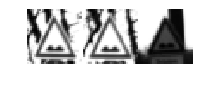

23. ['Slippery road']


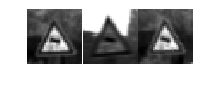

24. ['Road narrows on the right']


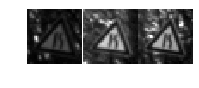

25. ['Road work']


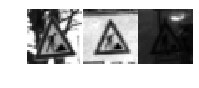

26. ['Traffic signals']


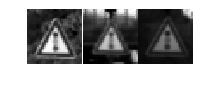

27. ['Pedestrians']


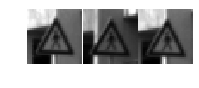

28. ['Children crossing']


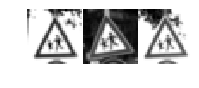

29. ['Bicycles crossing']


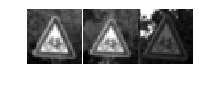

30. ['Beware of ice/snow']


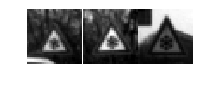

31. ['Wild animals crossing']


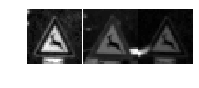

32. ['End of all speed and passing limits']


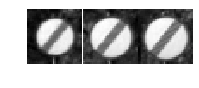

33. ['Turn right ahead']


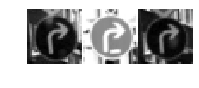

34. ['Turn left ahead']


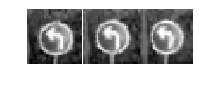

35. ['Ahead only']


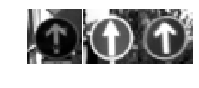

36. ['Go straight or right']


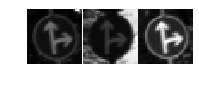

37. ['Go straight or left']


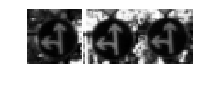

38. ['Keep right']


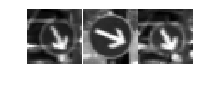

39. ['Keep left']


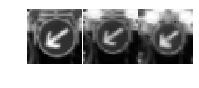

40. ['Roundabout mandatory']


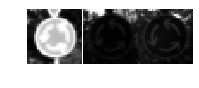

41. ['End of no passing']


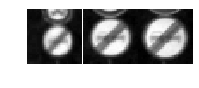

42. ['End of no passing by vehicles over 3.5 metric tons']


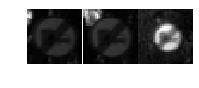

In [185]:

X_train_normalized = preProcess(X_train)
X_test_normalized = preProcess(X_test)
X_valid_normalized = preProcess(X_valid)
plotRandomly(X_valid_normalized,y_valid,cmap="gray",squeeze=True)

shape in/out: (32, 32, 1) (32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


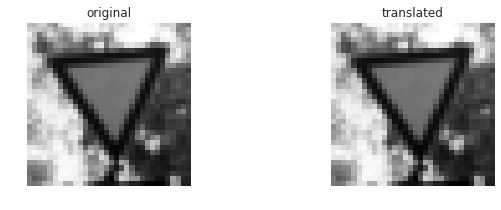

In [186]:


def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 3
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train_normalized[22222]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


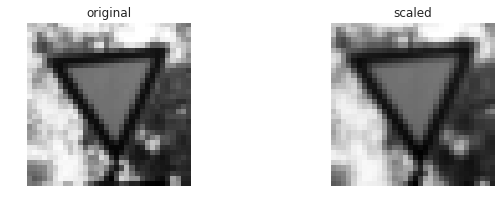

In [187]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


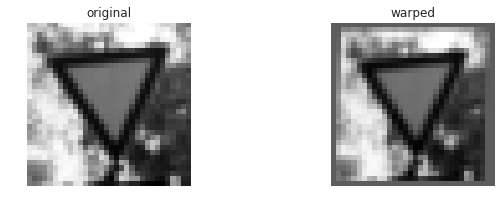

In [188]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


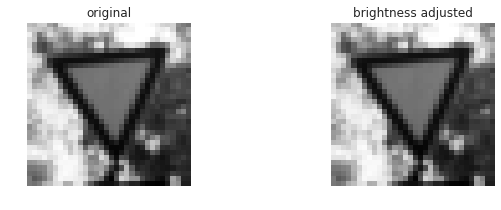

In [189]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


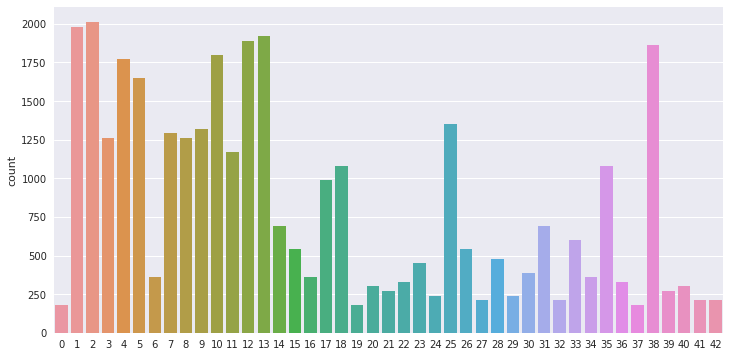

In [190]:
## Histogram of label Frequency
plt.figure(figsize=(12,6))
sns.countplot(x = y_train,)

In [191]:
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label: 180


In [192]:
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)


In [193]:

"""
input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
        
print('X, y shapes:', X_train_normalized.shape, y_train.shape)    
"""

"\ninput_indices = []\noutput_indices = []\n\nfor class_n in range(n_classes):\n    print(class_n, ': ', end='')\n    class_indices = np.where(y_train == class_n)\n    n_samples = len(class_indices[0])\n    if n_samples < 800:\n        for i in range(800 - n_samples):\n            input_indices.append(class_indices[0][i%n_samples])\n            output_indices.append(X_train_normalized.shape[0])\n            new_img = X_train_normalized[class_indices[0][i % n_samples]]\n            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))\n            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)\n            y_train = np.concatenate((y_train, [class_n]), axis=0)\n        \nprint('X, y shapes:', X_train_normalized.shape, y_train.shape)    \n"

In [194]:

aug_train = {'features': X_train_normalized,
             'labels': y_train}
aug_val = {'features': X_valid_normalized,
             'labels': y_valid}
aug_test = {'features': X_test_normalized,
             'labels': y_test}
pickle.dump(aug_train, open( "aug_train.p", "wb" ) )
pickle.dump(aug_val, open( "aug_val.p", "wb" ) )
pickle.dump(aug_test, open( "aug_test.p", "wb" ) )

print('done')

done


In [195]:

# Load pickled data
import pickle

training_file = "aug_train.p"
validation_file = "aug_val.p"
testing_file = "aug_test.p"

with open(training_file, mode='rb') as f:
    aug_train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    aug_val = pickle.load(f)
with open(testing_file, mode='rb') as f:
    aug_test = pickle.load(f)
    
X_train, y_train = aug_train['features'], aug_train['labels']
X_valid, y_valid = aug_val['features'], aug_val['labels']
X_test, y_test = aug_test['features'], aug_test['labels']

In [196]:

print("Old X_train size:",len(X_train))
print("New X_train size:",len(X_valid))
print("X_validation size:",len(X_test))

print("Old X_train size:",len(y_train))
print("New X_train size:",len(y_valid))
print("X_validation size:",len(y_test))

Old X_train size: 34799
New X_train size: 4410
X_validation size: 12630
Old X_train size: 34799
New X_train size: 4410
X_validation size: 12630


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


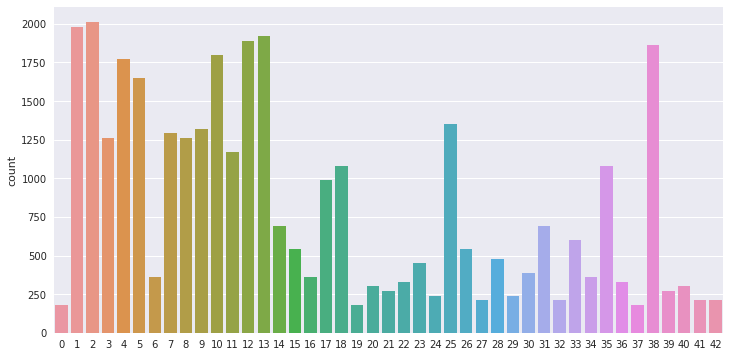

In [197]:
## Histogram of label Frequency
plt.figure(figsize=(12,6))
sns.countplot(x = y_train)

### Model Architecture

In [198]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    strides = 1
    k = 2
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_w,strides=[1, strides, strides, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    
    conv1 = tf.nn.relu(conv1)   

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, k, k, 1],strides=[1, k, k, 1],padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1,conv2_w,strides=[1, strides, strides, 1], padding='VALID') + conv2_b
       
    # TODO: Activation.
    
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, k, k, 1],strides=[1, k, k, 1],padding='VALID')
    

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    
    fc0   = flatten(conv2)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 256.
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1  = tf.matmul(fc0, fc1_W) + fc1_b
    
    
    # TODO: Activation.
    
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [199]:
import tensorflow as tf

In [200]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

In [201]:
rate = 0.001
EPOCHS = 20
BATCH_SIZE = 128
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [202]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [203]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.660

EPOCH 2 ...
Validation Accuracy = 0.803

EPOCH 3 ...
Validation Accuracy = 0.822

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 5 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.920

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 9 ...
Validation Accuracy = 0.931

EPOCH 10 ...
Validation Accuracy = 0.933

EPOCH 11 ...
Validation Accuracy = 0.929

EPOCH 12 ...
Validation Accuracy = 0.943

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.943

EPOCH 15 ...
Validation Accuracy = 0.938

EPOCH 16 ...
Validation Accuracy = 0.945

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.949

EPOCH 19 ...
Validation Accuracy = 0.947

EPOCH 20 ...
Validation Accuracy = 0.946

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [204]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [205]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.



### Analyze Performance

In [206]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.928


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [207]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [208]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")